#### The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. So,this system is used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.


In [1]:
#to import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#to load our dataset
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#to check total no. of records
df.shape

(284807, 31)

In [4]:
#to check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 here, we see there are no null vlaues in our dataset, 
 
now we make sure that any null values are replaced by objects

In [5]:
#checking for datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

as we can see, there are no null values in our dataset

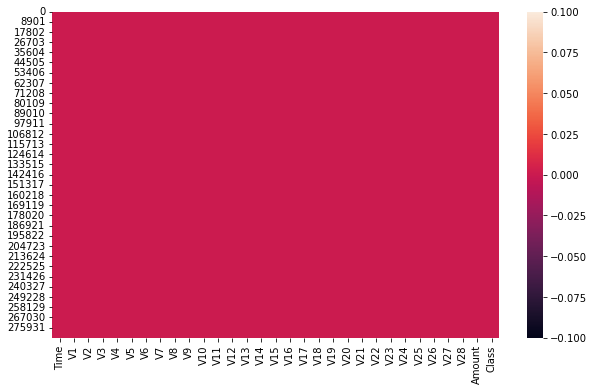

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

In [7]:
#to check or correlation between the features and the output
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


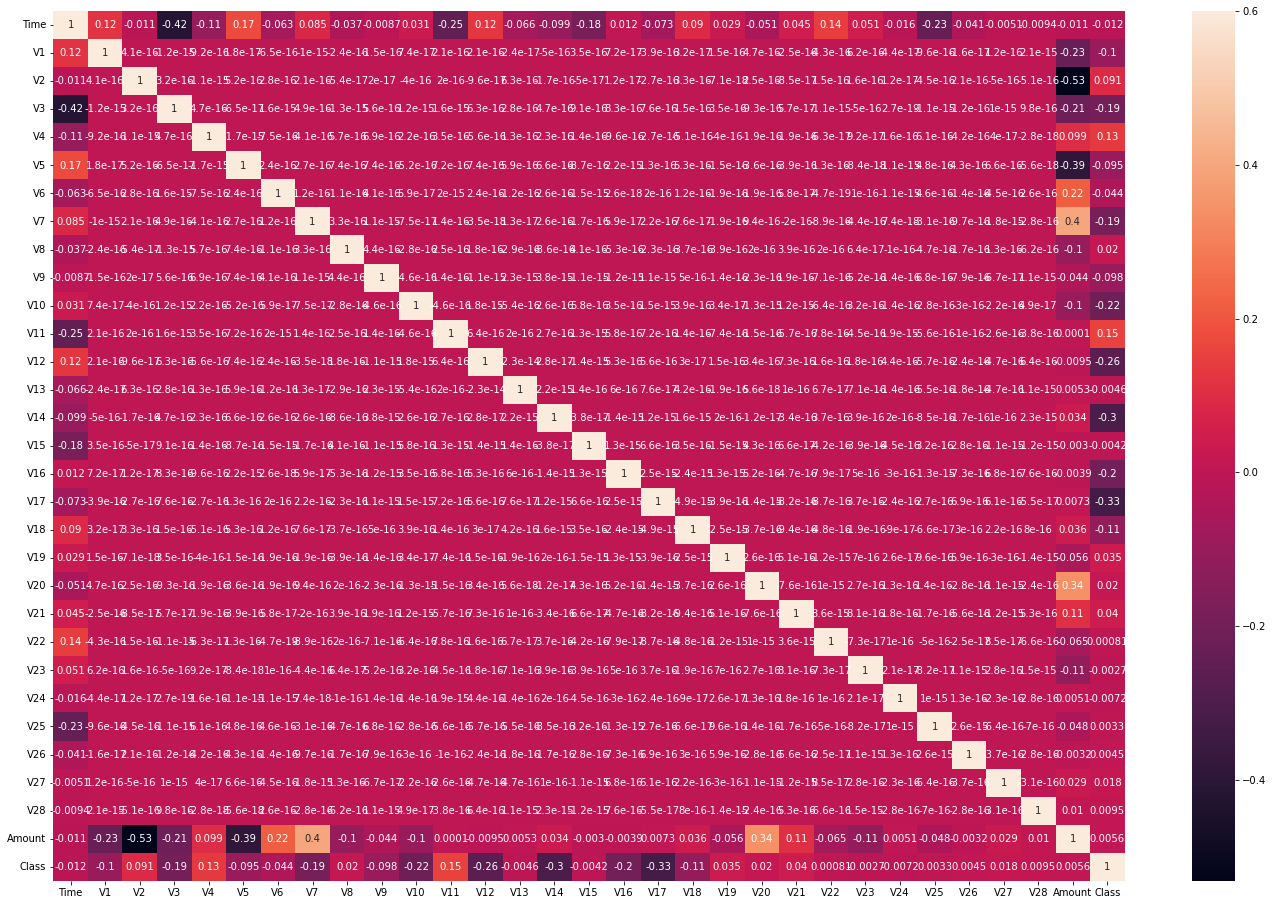

In [8]:
#to visualize and understand in a better manner , we use heatmap
plt.figure(figsize=(24,16))
sns.heatmap(df.corr(),vmax=0.6,annot=True)
plt.show()

In [9]:
#now we check the skewness in each column
'''for col in df:
    print("Skewness of",col,"is",df[col].skew())
    sns.distplot(df[col])
    plt.show()'''

'for col in df:\n    print("Skewness of",col,"is",df[col].skew())\n    sns.distplot(df[col])\n    plt.show()'

In [10]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

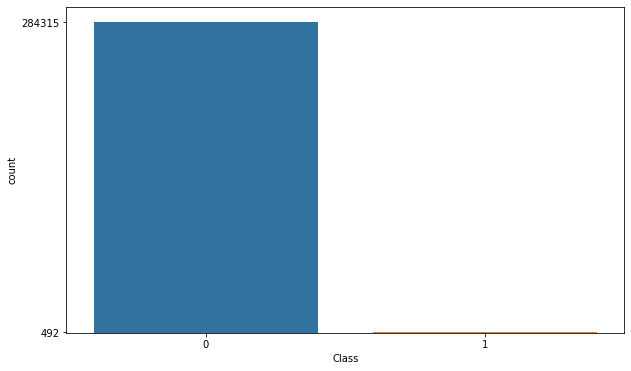

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

as we can see , our data is not balanced and we need to balance our target before doing the train test split for maximum
accuracy results from our models

In [12]:
#first we select input and output and then split our data
X=df.drop("Class",axis=1)
Y=df["Class"]

In [13]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

### Using Random over sampler 

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
#checking before applying ros on training data
Y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [16]:
#creating object of RandomOverSampler class
ros=RandomOverSampler()

In [17]:
#applying ros on training data
X_train,Y_train=ros.fit_resample(X_train,Y_train)

In [18]:
#checking afte applying ros on training data
Y_train.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [19]:
#same for testing data
#checking before applying ros on testing data
Y_test.value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [20]:
#applying ros on testing data
X_test,Y_test=ros.fit_resample(X_test,Y_test)

In [21]:
#checking after applying ros on training data
Y_test.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [22]:
#applying scaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
#now that our data is balanced, we can build our model

In [23]:
# creating a user defined function : 

def create_model(model):
    model.fit(X_train,Y_train)    #train the model
    Y_pred=model.predict(X_test)    #test the model
    print(classification_report(Y_test,Y_pred))
    conf_mat = confusion_matrix(Y_test,Y_pred)
    sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues',fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Output")
    plt.ylabel("Actual Output")
    plt.show()
    return model

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616



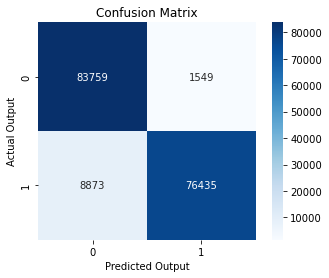

In [26]:
#calling our function
lr=create_model(lr)

### Decision Tree Using Gini Index

#### 1. Max Depth

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1,max_depth=3)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.98      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616



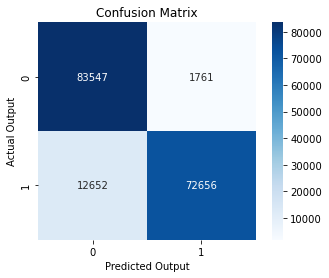

In [28]:
dtc=create_model(dtc)

In [29]:
#show information gain of all input features
IG=dtc.feature_importances_
I=X.columns
dic={"input Column":I,"Information Gain":IG}
F=pd.DataFrame(dic)
F.sort_values("Information Gain",ascending=False,ignore_index=True)

,input Column,Information Gain
0,V14,0.893878
1,V4,0.049789
2,V20,0.025319
3,V10,0.020864
4,V12,0.010150
5,Time,0.000000
6,V22,0.000000
7,V19,0.000000
8,V21,0.000000
9,V23,0.000000


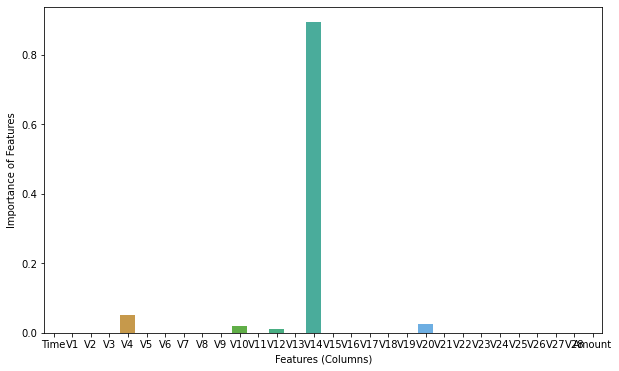

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=F,x="input Column",y="Information Gain")
plt.xlabel("Features (Columns)")
plt.ylabel("Importance of Features")
plt.show()

#### 2. min samples leaf

In [31]:
dtc1=DecisionTreeClassifier(random_state=1,min_samples_leaf=100)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     85308
           1       0.99      0.83      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616



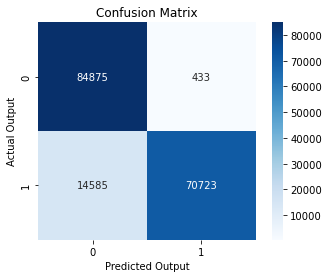

In [32]:
dtc1=create_model(dtc1)

In [33]:
#show information gain of all input features
IG=dtc1.feature_importances_
I=X.columns
dic={"input Column":I,"Information Gain":IG}
F=pd.DataFrame(dic)
F.sort_values("Information Gain",ascending=False,ignore_index=True)

,input Column,Information Gain
0,V14,7.513274e-01
1,V4,4.508150e-02
2,V10,4.034006e-02
3,V20,2.293368e-02
4,V13,2.004287e-02
5,V12,1.854169e-02
6,V5,1.629461e-02
7,V7,1.129746e-02
8,Time,1.117753e-02
9,Amount,1.064758e-02


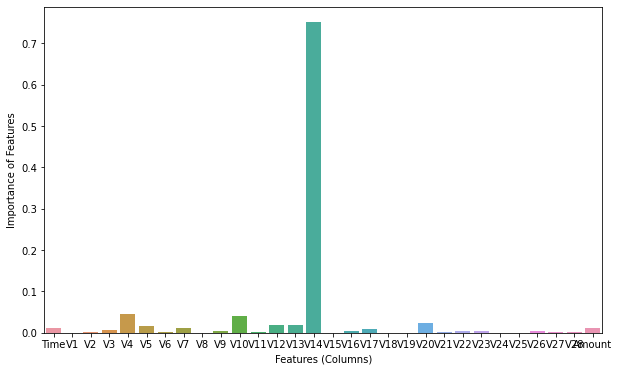

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=F,x="input Column",y="Information Gain")
plt.xlabel("Features (Columns)")
plt.ylabel("Importance of Features")
plt.show()

### Decision Tree Using Entropy

#### 1. max depth

In [35]:
dt=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=3)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.97      0.85      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616



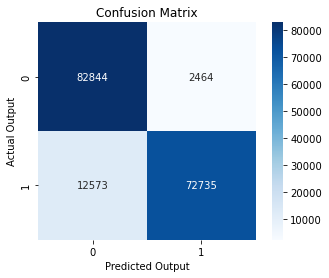

In [36]:
dt=create_model(dt)

In [37]:
#show information gain of all input features
IG=dt.feature_importances_
I=X.columns
dic={"input Column":I,"Information Gain":IG}
F=pd.DataFrame(dic)
F.sort_values("Information Gain",ascending=False,ignore_index=True)

,input Column,Information Gain
0,V14,0.881237
1,V4,0.073445
2,V12,0.022861
3,Amount,0.020293
4,V10,0.002164
5,V22,0.000000
6,V19,0.000000
7,V20,0.000000
8,V21,0.000000
9,V23,0.000000


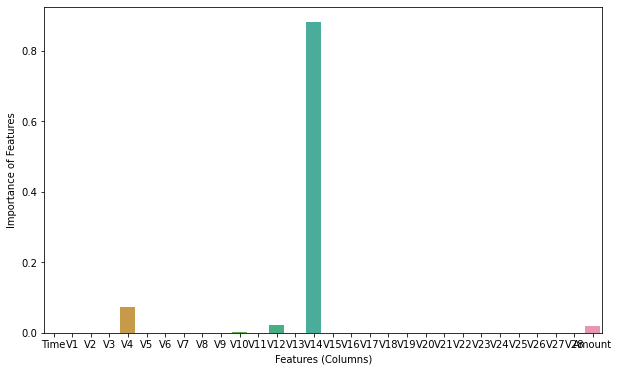

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=F,x="input Column",y="Information Gain")
plt.xlabel("Features (Columns)")
plt.ylabel("Importance of Features")
plt.show()

#### 2. min samples leaf

In [39]:
dt1=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=50)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616



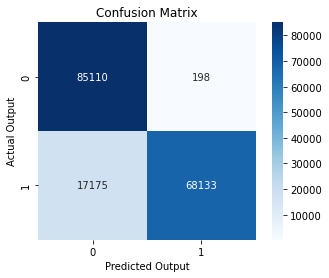

In [40]:
dt1=create_model(dt1)

In [41]:
#show information gain of all input features
IG=dt1.feature_importances_
I=X.columns
dic={"input Column":I,"Information Gain":IG}
F=pd.DataFrame(dic)
F.sort_values("Information Gain",ascending=False,ignore_index=True)

,input Column,Information Gain
0,V14,0.694313
1,V4,0.070313
2,Amount,0.035957
3,V12,0.027888
4,V22,0.022735
5,V26,0.015533
6,V2,0.013265
7,V10,0.012092
8,V11,0.012044
9,V16,0.011352


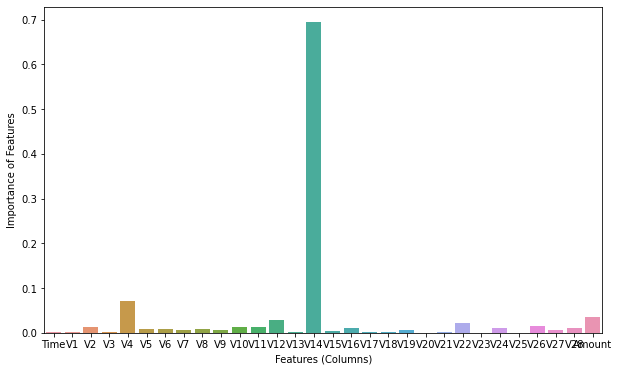

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(data=F,x="input Column",y="Information Gain")
plt.xlabel("Features (Columns)")
plt.ylabel("Importance of Features")
plt.show()

### Random Forest Classifier Using Gini Index

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1,n_estimators=100,max_depth=4)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     85308
           1       1.00      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616



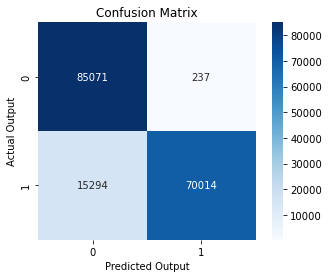

In [44]:
rfc=create_model(rfc)

In [45]:
#show information gain of all input features
IG=rfc.feature_importances_
I=X.columns
dic={"input Column":I,"Information Gain":IG}
F=pd.DataFrame(dic)
F.sort_values("Information Gain",ascending=False,ignore_index=True)

,input Column,Information Gain
0,V14,0.223053
1,V10,0.137138
2,V17,0.119753
3,V4,0.109534
4,V11,0.090469
5,V12,0.088744
6,V16,0.061788
7,V3,0.036170
8,V2,0.026889
9,V7,0.021086


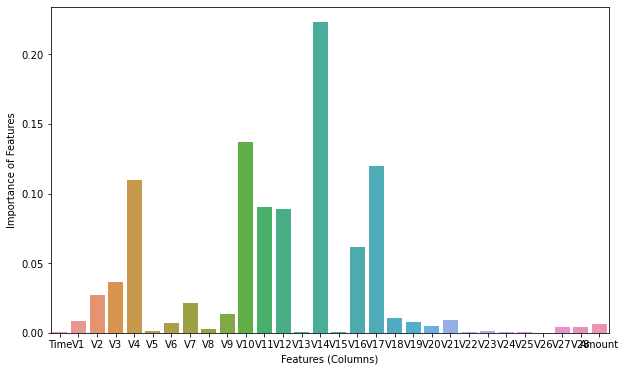

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=F,x="input Column",y="Information Gain")
plt.xlabel("Features (Columns)")
plt.ylabel("Importance of Features")
plt.show()

### Random Forest Classifier Using Entropy

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.90    170616
weighted avg       0.92      0.91      0.90    170616



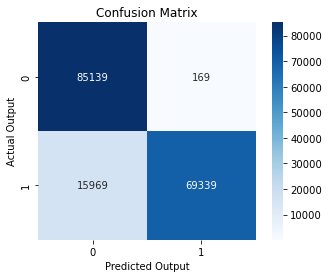

In [47]:
rfc1=RandomForestClassifier(random_state=1,criterion="entropy",n_estimators=100,max_depth=4)
rfc1=create_model(rfc1)

In [48]:
#show information gain of all input features
IG=rfc1.feature_importances_
I=X.columns
dic={"input Column":I,"Information Gain":IG}
F=pd.DataFrame(dic)
F.sort_values("Information Gain",ascending=False,ignore_index=True)

,input Column,Information Gain
0,V14,0.231484
1,V10,0.143166
2,V17,0.123754
3,V11,0.106143
4,V4,0.104244
5,V12,0.066887
6,V16,0.057880
7,V3,0.034524
8,V2,0.022564
9,V7,0.019662


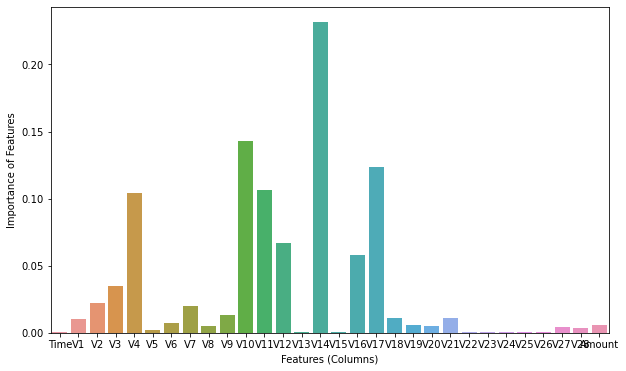

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(data=F,x="input Column",y="Information Gain")
plt.xlabel("Features (Columns)")
plt.ylabel("Importance of Features")
plt.show()

### ADA Boosting ( Adaptor Boosting )

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
ada=AdaBoostClassifier(random_state=1,n_estimators=30)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     85308
           1       0.98      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616



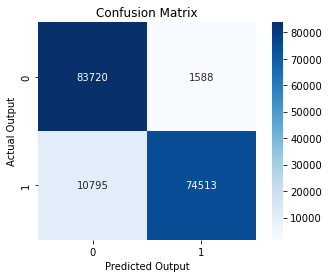

In [52]:
ada=create_model(ada)

In [53]:
#show information gain of all input features
IG=ada.feature_importances_
I=X.columns
dic={"input Column":I,"Information Gain":IG}
F=pd.DataFrame(dic)
F.sort_values("Information Gain",ascending=False,ignore_index=True)

,input Column,Information Gain
0,V14,0.166667
1,V4,0.133333
2,Amount,0.100000
3,V12,0.066667
4,V28,0.066667
5,V18,0.066667
6,V10,0.066667
7,V21,0.033333
8,V20,0.033333
9,V16,0.033333


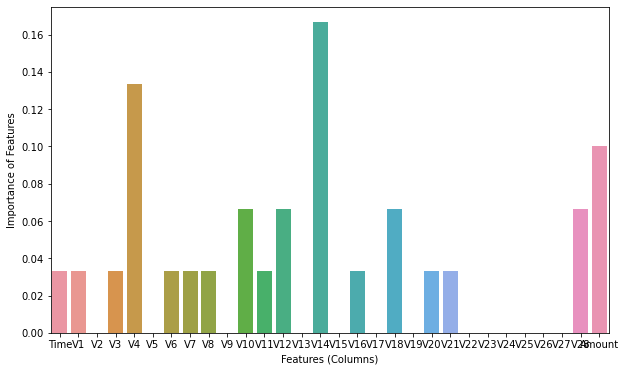

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(data=F,x="input Column",y="Information Gain")
plt.xlabel("Features (Columns)")
plt.ylabel("Importance of Features")
plt.show()

### Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=35,random_state=1)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616



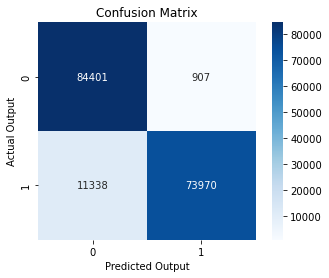

In [56]:
gbc=create_model(gbc)

In [57]:
#show information gain of all input features
IG=gbc.feature_importances_
I=X.columns
dic={"input Column":I,"Information Gain":IG}
F=pd.DataFrame(dic)
F.sort_values("Information Gain",ascending=False,ignore_index=True)

,input Column,Information Gain
0,V14,0.782936
1,V4,0.066551
2,V10,0.042192
3,V12,0.029668
4,V20,0.022071
5,Amount,0.011967
6,V19,0.007465
7,V11,0.005930
8,V8,0.003795
9,V13,0.003707


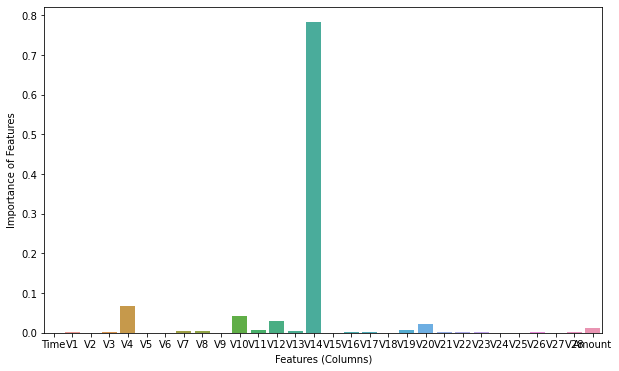

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(data=F,x="input Column",y="Information Gain")
plt.xlabel("Features (Columns)")
plt.ylabel("Importance of Features")
plt.show()

### Extreme Gradient Boosting

In [59]:
from xgboost import XGBClassifier
xgc = XGBClassifier(n_estimators=50,reg_alpha=1,random_state=1)

[01:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616



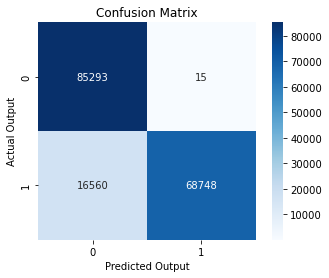

In [60]:
xgc=create_model(xgc)

In [61]:
#show information gain of all input features
IG=xgc.feature_importances_
I=X.columns
dic={"input Column":I,"Information Gain":IG}
F=pd.DataFrame(dic)
F.sort_values("Information Gain",ascending=False,ignore_index=True)

,input Column,Information Gain
0,V14,0.542256
1,V4,0.062137
2,V10,0.037655
3,V20,0.035883
4,V12,0.034394
5,Amount,0.029911
6,V13,0.024060
7,V19,0.022104
8,V26,0.017971
9,V8,0.015386


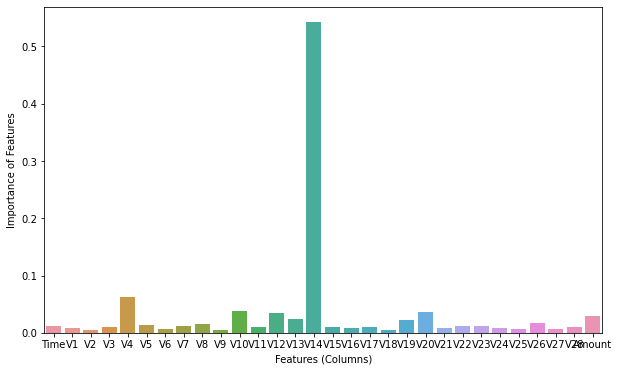

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(data=F,x="input Column",y="Information Gain")
plt.xlabel("Features (Columns)")
plt.ylabel("Importance of Features")
plt.show()

### Support Vector Machine

#### 1. Linear SVC

In [63]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=1,C=0.99)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616



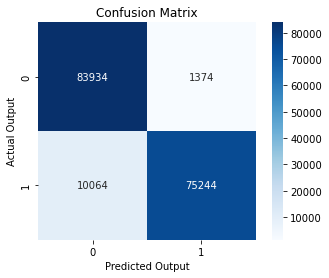

In [64]:
svc=create_model(svc)

#### 2. SVC Polynomial Kernel Function

In [65]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     85308
           1       0.99      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616



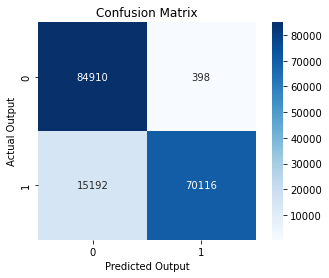

In [66]:
svc1= SVC(random_state=1,kernel='poly')
svc1 = create_model(svc1)

#### 3. SVC Radial Basis Kernel Function

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     85308
           1       0.99      0.76      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616



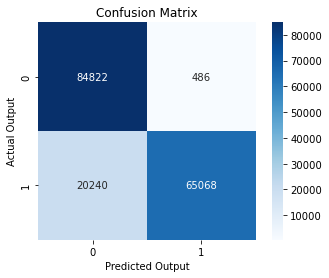

In [67]:
svc2 = SVC(random_state=1,kernel='rbf')
svc2 = create_model(svc2)

### KNeighborsClassifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85308
           1       1.00      0.76      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616



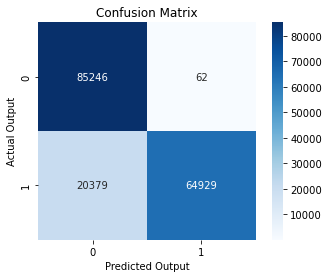

In [70]:
knc = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knc = create_model(knc)